# Multilingual CLIP

## Install Requirements and Download OpenAI CLIP Model
This section might take some minutes.

In [ ]:
import subprocess
CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

!pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
!pip install ftfy==5.8
!pip install transformers

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os, random
import torch

import warnings
warnings.filterwarnings("ignore")

!pip install git+https://github.com/openai/CLIP.git
import clip

!git clone https://github.com/FreddeFrallan/Multilingual-CLIP
%cd Multilingual-CLIP
!bash get-weights.sh

CUDA version: 11.1
Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-x223ovwo
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-x223ovwo
fatal: destination path 'Multilingual-CLIP' already exists and is not an empty directory.
/content/Multilingual-CLIP
--2022-04-13 04:10:55--  https://www.dropbox.com/s/s77xw5308jeljlp/Swedish-500k%20Linear%20Weights.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/s77xw5308jeljlp/Swedish-500k%20Linear%20Weights.pkl [following]
--2022-04-13 04:10:55--  https://www.dropbox.com/s/raw/s77xw5308jeljlp/Swedish-500k%20Linear%20Weights.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Lo

### Load The Multilingual Text Encoder

In [ ]:
from src import multilingual_clip
text_model = multilingual_clip.load_model('M-BERT-Distil-40')

### Load The Matching CLIP Model

In [ ]:
clip_model, compose = clip.load('RN50x4')

# input_resolution = clip_model.input_resolution.item()
# context_length = clip_model.context_length.item()
# vocab_size = clip_model.vocab_size.item()

input_resolution = clip_model.visual.input_resolution
context_length = clip_model.context_length
vocab_size = clip_model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 178,300,601
Input resolution: 288
Context length: 77
Vocab size: 49408


### Read in the Images

torch.Size([3, 288, 288])


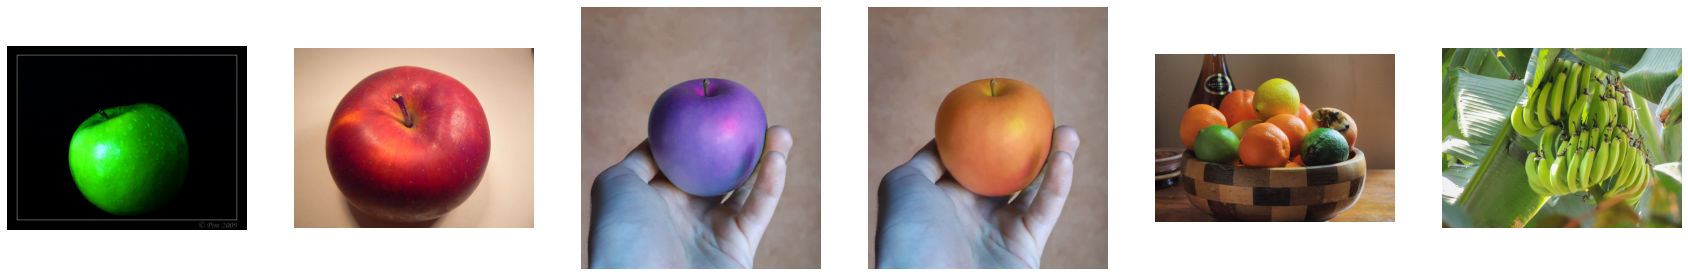

In [ ]:
main_path = '/content/Multilingual-CLIP/Images/'
demo_images = {
    'Green Apple': 'green apple.jpg',
    'Red Apple': 'red apple.jpg',
    'Purple Apple': 'purple apple.png',
    'Orange Apple': 'Orange Apple.png',
    'Fruit Bowl': 'fruit bowl.jpg',
    'Bananas on Tree': 'bananas.jpg',
}
images = {name: Image.open(main_path + p) for name, p in demo_images.items()}

print(compose(images['Green Apple']).shape)

fig = plt.figure()
fig.set_size_inches(30,5)
for i, img in enumerate(images.values()):
  a=fig.add_subplot(1,len(images), i+1)
  plt.imshow(img, )
  plt.axis('off')

### Create Captions

In [ ]:
russan_captions = [
    'Зеленое яблоко', 'Красное яблоко', 'Фиолетовое яблоко', 'Апельсиновое яблоко', 'Миска с фруктами', 'Гроздь бананов свисает с дерева'  
]

french_captions = [
    'Une pomme verte', 'Une pomme rouge', 'Une pomme violette', 'Une pomme orange', 'Un bol rempli de fruits', 'Un tas de bananes pendu à un arbre'           
]

german_captions = [
    'Ein grüner Apfel', 'Ein roter Apfel', 'Ein lila Apfel', 'Ein orangefarbener Apfel', 'Eine Schüssel voller Früchte', 'Ein Bündel Bananen hängt an einem Baum'           
]

spanish_captions = [
    'Una manzana verde', 'Una manzana roja', 'Una manzana de color lila', 'Una manzana de color naranja', 'Un frutero lleno de fruta', 'Un racimo de bananas colgados de un banano',
]

greek_captions = [
    'Ένα πράσινο μήλο', 'Ένα κόκκινο μήλο', 'Ένα μοβ μήλο', 'Ένα πορτοκαλί μήλο', 'Ένα μπολ γεμάτο με φρούτα', 'Ένα τσαμπί μπανάνες κρεμάμενες από ένα δέντρο',
]

swedish_captions = [
    'Ett grönt äpple', 'Ett rött äpple', 'Ett lila äpple', 'Ett oranget äpple', 'En skål fylld med frukt', 'En klase bananer som hänger från ett träd'           
]

chinese_captions = [
    '青苹果', '红苹果', '紫苹果', '橙苹果', '果盘', '树上的香蕉'
]

korean_captions = [
    '그린애플', '빨간 사과', '보라색 사과', '오렌지 애플', '과일 그릇', '나무에 바나나'
]

japanese_captions = [
    '青りんご', '赤いリンゴ', 'パープルアップル', 'オレンジアップル', 'フルーツボウル', '木の上のバナナ'
]

all_captions = {'Russian': russan_captions, 'French': french_captions, 'German': german_captions,
                'Spanish': spanish_captions, 'Greek': greek_captions, 'Swedish': swedish_captions,
                'Chinese': chinese_captions, 'Korean': korean_captions, 'Japanese': japanese_captions
                }

### Prepare Images for CLIP

In [ ]:
img_input = torch.stack([compose(img).to('cpu') for img in images.values()])
# img_input = torch.stack([compose(img) for img in images.values()])

### Generate Text & Vision Embeddings

In [ ]:
with torch.no_grad():
    # image_embs = clip_model.encode_image(img_input).float().to('cpu')
    img_input = img_input.to('cuda')
    image_embs = clip_model.encode_image(img_input).float()

    language_embs = {}
    for lang, captions in all_captions.items():
      language_embs[lang] = text_model(captions)

print("CLIP-Vision: {}".format(image_embs.shape))
for lang, embs in language_embs.items():
  print("{}: {}".format(lang, embs.shape))

CLIP-Vision: torch.Size([6, 640])
Russian: torch.Size([6, 640])
French: torch.Size([6, 640])
German: torch.Size([6, 640])
Spanish: torch.Size([6, 640])
Greek: torch.Size([6, 640])
Swedish: torch.Size([6, 640])
Chinese: torch.Size([6, 640])
Korean: torch.Size([6, 640])
Japanese: torch.Size([6, 640])


### Compare Predictions

Compare the Cosine-Similarities between the image embeddings and the different language embeddings.

In [ ]:
def compare_embeddings(logit_scale, img_embs, txt_embs):
  # normalized features
  image_features = img_embs / img_embs.norm(dim=-1, keepdim=True)
  text_features = txt_embs / txt_embs.norm(dim=-1, keepdim=True)

  # cosine similarity as logits
  logits_per_image = logit_scale * image_features @ text_features.t()
  logits_per_text = logit_scale * text_features @ image_features.t()

  # shape = [global_batch_size, global_batch_size]
  return logits_per_image, logits_per_text

# CLIP Temperature scaler
# logit_scale = clip_model.logit_scale.exp().float().to('cpu')
logit_scale = clip_model.logit_scale.exp().float()

language_logits = {}
for lang, embs in language_embs.items():
    embs = embs.to('cuda')
    language_logits[lang] = compare_embeddings(logit_scale, image_embs, embs)

### Visualize Results

Here we will not visualize the results, so that every column is the Softmax distribution over all the texts for the respective image.

Language: Russian


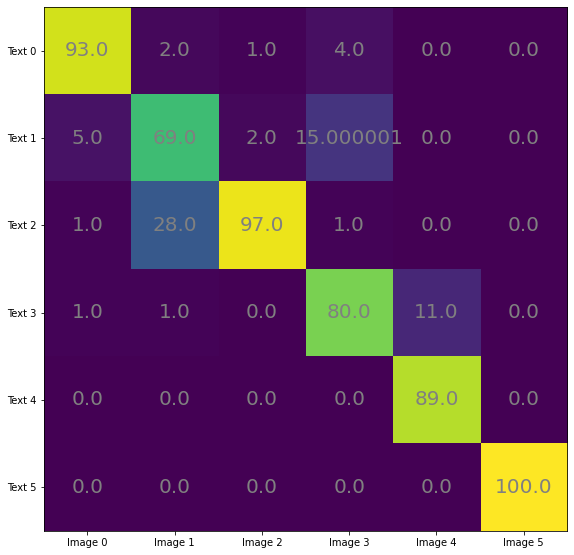

Language: French


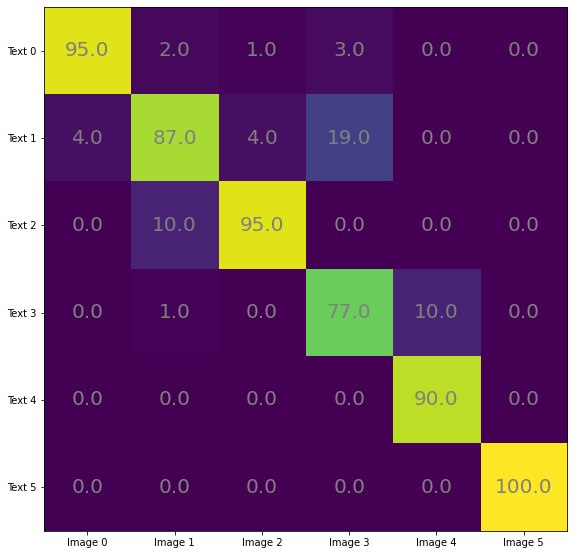

Language: German


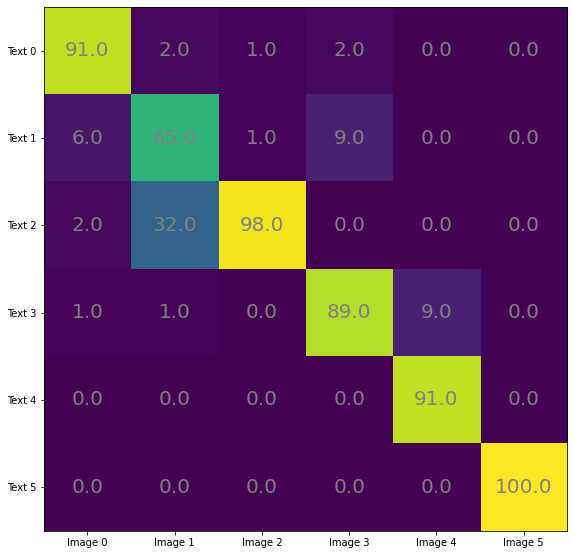

Language: Spanish


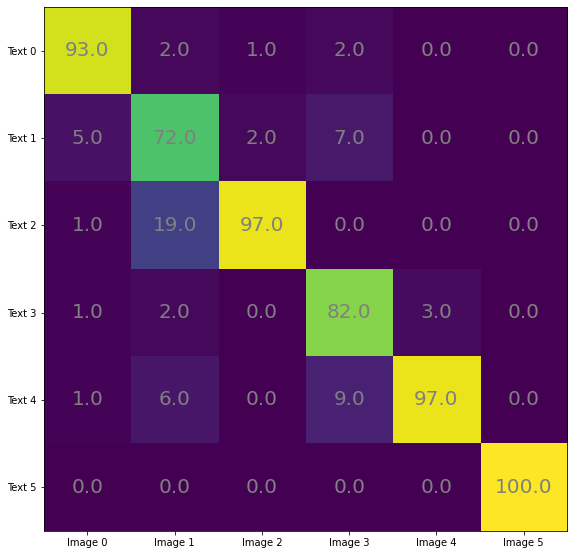

Language: Greek


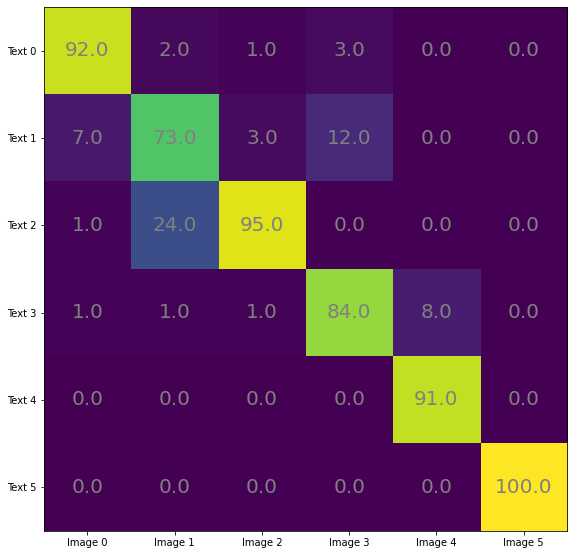

Language: Swedish


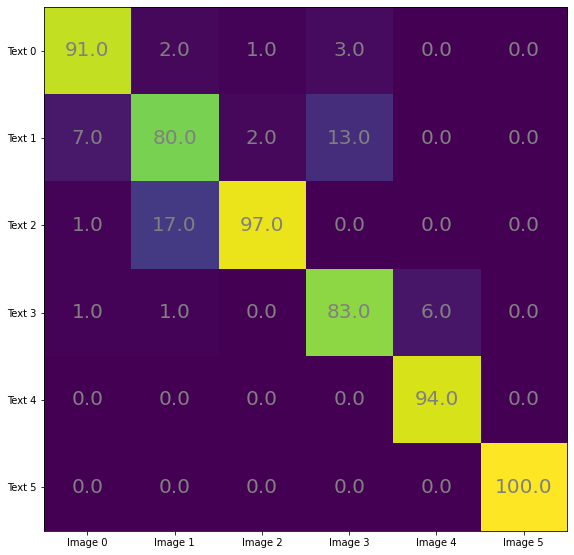

Language: Chinese


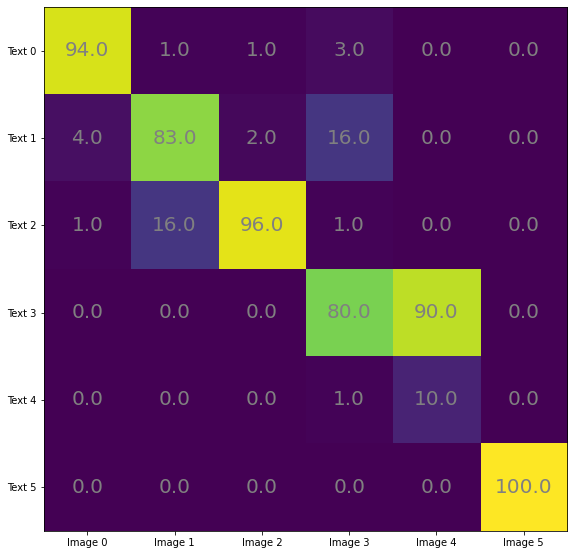

Language: Korean


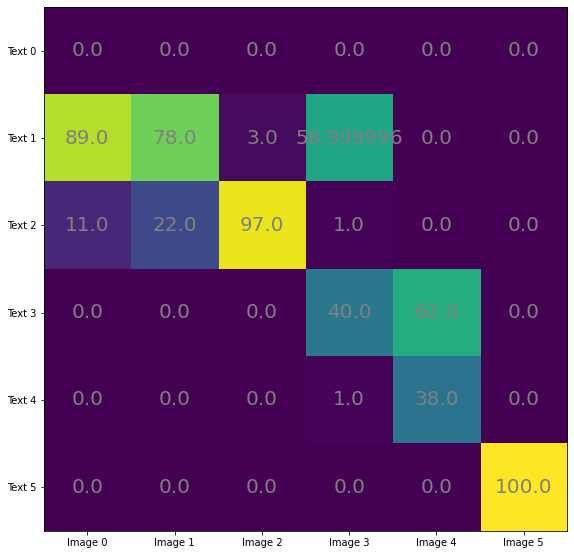

Language: Japanese


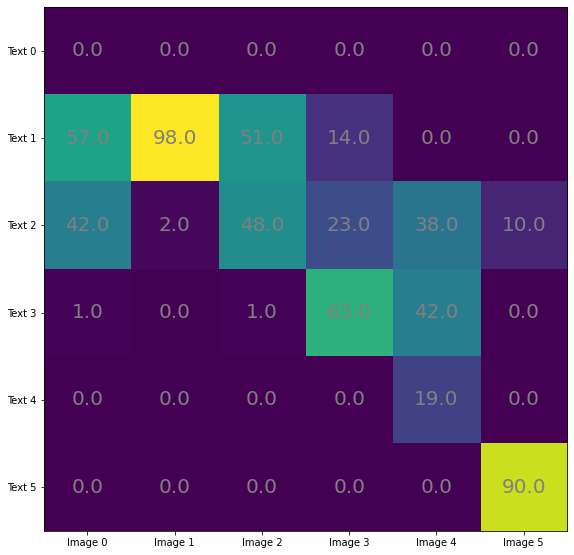

In [ ]:
def plot_heatmap(result_matrix):
  height, width = result_matrix.shape
  fig, ax = plt.subplots()
  fig.set_size_inches(8,8)
  im = ax.imshow(result_matrix)



  # Create X & Y Labels
  ax.set_xticks(np.arange(width))
  ax.set_yticks(np.arange(height))
  ax.set_xticklabels(["Image {}".format(i) for i in range(width)])
  ax.set_yticklabels(["Text {}".format(i) for i in range(height)])

  for i in range(height):
    for j in range(width):
        text = ax.text(j, i, result_matrix[i, j],
                       ha="center", va="center", color='grey', size=20)

  fig.tight_layout()
  plt.show()

for lang, (img_logits, txt_logits) in language_logits.items():
  # Convert Logits into Softmax predictions
  probs = img_logits.softmax(dim=-1).cpu().detach().numpy()

  # Transpose so that each column is the softmax for each picture over the texts
  probs = np.around(probs, decimals=2).T * 100

  print("Language: {}".format(lang))
  plot_heatmap(probs)

## Conclusion
Although the diagonal is not completely maxed out, all languages managed to correctly classify all images. Interestingly, all languages had an easier time classifying the purple apple which was photoshopped than the red apple.

## Setup Colab


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
import sys

# TODO: Fill in the Google Drive path where you uploaded the folder
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = "Colab Notebooks/Multilingual-CLIP"
GOOGLE_DRIVE_PATH = os.path.join("drive", "My Drive", GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))


# Add to sys so we can import .py files.
sys.path.append(GOOGLE_DRIVE_PATH)

['README.md', 'get-weights.sh', 'inference.py', '.gitignore', '.ipynb_checkpoints', 'src', 'Model Cards', 'Images', 'Multilingual_CLIP.ipynb']


## Preprocess the WIT data
We plan to use the 1% data sample file from the WIT : Wikipedia-based Image Text Dataset.
Since only the training data is released for WIT, we will use the training data for zero-shot testing and potential fine-tuning here.

In [5]:
download = True # set to true for the first time
if download:
  !wget https://storage.googleapis.com/gresearch/wit/wit_v1.train.all-1percent_sample.tsv.gz
  # !gzip -c wit_v1.train.all-1percent_sample.tsv.gz > "drive/My Drive/Colab Notebooks/Multilingual-CLIP/wit_sampled.tsv"

import pandas as pd
data = pd.read_csv('wit_v1.train.all-1percent_sample.tsv.gz', compression='gzip', sep='\t')
print(data)

--2022-04-24 18:15:03--  https://storage.googleapis.com/gresearch/wit/wit_v1.train.all-1percent_sample.tsv.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 108.177.119.128, 108.177.126.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267198461 (255M) [text/tab-separated-values]
Saving to: ‘wit_v1.train.all-1percent_sample.tsv.gz’

wit_v1.train.all-1p 100%[===================>] 254.82M  88.8MB/s    in 2.9s    

2022-04-24 18:15:06 (88.8 MB/s) - ‘wit_v1.train.all-1percent_sample.tsv.gz’ saved [267198461/267198461]

       language                                           page_url  \
0            es       https://es.wikipedia.org/wiki/Hoz_y_martillo   
1            de    https://de.wikipedia.org/wiki/Kleines_Hasenmaul   
2            ru  https://ru.wikipedia.org/wiki/%D0%A3%D0%BA%D1%...   
3            ru  https://ru.wikipedia.org/wiki/%D0%9C%D0%

Dataframe Shape: (370373, 17) 

Columns Names:
  Index(['language', 'page_url', 'image_url', 'page_title', 'section_title',
       'hierarchical_section_title', 'caption_reference_description',
       'caption_attribution_description', 'caption_alt_text_description',
       'mime_type', 'original_height', 'original_width', 'is_main_image',
       'attribution_passes_lang_id', 'page_changed_recently',
       'context_page_description', 'context_section_description'],
      dtype='object') 

Sample entry:
language                                                                          es
page_url                                https://es.wikipedia.org/wiki/Hoz_y_martillo
image_url                          https://upload.wikimedia.org/wikipedia/commons...
page_title                                                            Hoz y martillo
section_title                                                               Emblemas
hierarchical_section_title                       Hoz y martillo / 

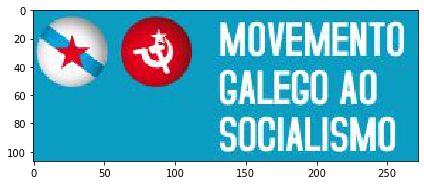

In [6]:
print("Dataframe Shape:", data.shape, "\n")
print("Columns Names:\n ", data.columns, "\n")
print("Sample entry:"); print(data.loc[0]);

# preview first downloaded image from image_url
from skimage import io

io.imshow(io.imread(data.loc[0].image_url))
io.show()

Next, we will group entries by column "language", and obtain groups of entries of different languages. We will analyze the distribution of different languages and select the top-n for the n smallest and n largest frequency for future experiments.

In [7]:
# get all languages
langs_lst = data['language'].tolist()
all_langs = list(set(langs_lst))
print("There are a total of", len(all_langs), "languages in the dataset:")
print(all_langs)

# count number of entries for each languages, find top-k most resourced/under-resourced languages
k = 10
k_largest = data.language.value_counts().nlargest(k)
k_smallest = data.language.value_counts().nsmallest(k)
print("Top k most resourced languages:\n", k_largest.axes[0].to_list())
print("Top k most under-resourced languages:\n", k_smallest.axes[0].to_list())

There are a total of 108 languages in the dataset:
[nan, 'my', 'sq', 'tt', 'ast', 'is', 'es', 'sk', 'et', 'oc', 'mr', 'bs', 'ml', 'sw', 'iw', 'ce', 'sl', 'be-tarask', 'ja', 'qu', 'vec', 'ru', 'ga', 'gl', 'mk', 'el', 'lt', 'ckb', 'fy', 'ko', 'vi', 'fil', 'lb', 'th', 'ka', 'lmo', 'az', 'io', 'ta', 'te', 'da', 'uz', 'hu', 'it', 'tr', 'ar', 'ceb', 'arz', 'be', 'la', 'de', 'jv', 'bn', 'nl', 'nds', 'sco', 'xmf', 'en', 'cy', 'ms', 'azb', 'hr', 'fr', 'bg', 'eu', 'mn', 'af', 'an', 'zh', 'kn', 'vo', 'hi', 'cv', 'bar', 'zh-TW', 'pl', 'tg', 'yue', 'sr', 'pa', 'ht', 'war', 'hy', 'mg', 'uk', 'ur', 'sv', 'fa', 'hsb', 'lah', 'ca', 'eo', 'nv', 'ne', 'ba', 'id', 'si', 'cs', 'pt', 'nn', 'lv', 'br', 'kk', 'ia', 'fi', 'ro', 'sr-Latn', 'no']
Top k most resourced languages:
 ['en', 'de', 'fr', 'es', 'ru', 'it', 'nl', 'pl', 'ja', 'uk']
Top k most under-resourced languages:
 ['ckb', 'si', 'ia', 'xmf', 'cv', 'my', 'hsb', 'qu', 'nds', 'ne']


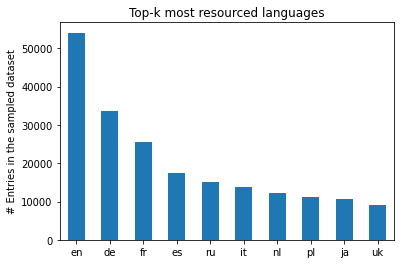

In [8]:
# Plot them on a bar chart
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Add some text for labels, title etc.
ax.set_ylabel('# Entries in the sampled dataset')
ax.set_title('Top-k most resourced languages')
ax = k_largest.plot.bar(rot=0)

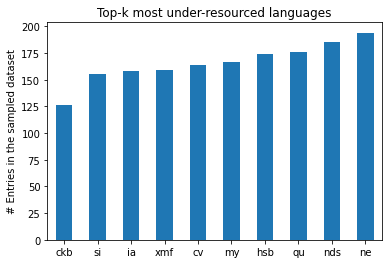

In [9]:
# Plot them on a bar chart
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Add some text for labels, title etc.
ax.set_ylabel('# Entries in the sampled dataset')
ax.set_title('Top-k most under-resourced languages')
ax = k_smallest.plot.bar(rot=0)

### Data Filtering and Build Dict
Then, we are going to use images from "image_url" and use texts from "caption_attribution_description", and construct training/testing/validation datasets with the given text-image pairs. At this time we will only consider the top-5 most resourced/under-resourced languages and later we need to ensure its compatiability with the fine-tuned text encoder from Multi-lingual CLIP.


Note: 

<ol>
<li>
Since not all images have a image reference description (some of them are NaN), we will filter out images with no reference description to avoid a mixture of different lanaguages (caption_alt_text_description or caption_attribution_description can be in English).
</li>

<li>
We will also filter out the invalid images not supported by the skimage/cv2 library, e.g. skg images, and for simplicity, only include the png and jpg files.
</li>

</ol>





In [10]:
LANGS = k_largest.axes[0].to_list()[:5] + k_smallest.axes[0].to_list()[:5] # Take the first 5 languages and make the dataset
print(LANGS)

all_lang_data = []
# IMG_TYPE = ['jpg', 'png', 'JPG', 'PNG', 'jpeg']

# drop rows where reference description is not available
data = data.dropna(subset=['caption_reference_description'])

for lang in LANGS:
    # select by languages first
    rows = data[data['language'] == lang]
    # # filter out entries with invalid images
    # ind_list = []
    # for i in range(rows.shape[0]):
    #     # if rows.iloc[i].image_url.split('.')[-1] in IMG_TYPE:
    #     try:
    #         img = io.imread(rows.iloc[i].image_url)
    #     except:
    #         continue
    #     ind_list.append(i)
    # rows = rows.iloc[ind_list]

    all_lang_data.append(rows[['language', 'image_url', 'caption_reference_description']])

print(all_lang_data[2].head()) # display a snippet of data

# Divide into train/test/val
data_dict = {
    'train': [], # list of panda dataframes
    'test': [],
    'val': [],
}

TRAIN_RATIO = 0.8
TEST_RATIO = 0.1
VAL_RATIO = 0.1

import random # random shuffle data
for one_lang_data in all_lang_data:
    num_entries = len(one_lang_data)
    num_train = int(num_entries * TRAIN_RATIO)
    num_test = int(num_entries * TEST_RATIO)
    num_val = int(num_entries * VAL_RATIO)

    idx = [i for i in range(num_entries)]
    random.shuffle(idx)
    train_idx = idx[:num_train]
    test_idx = idx[num_train:num_train+num_test]
    val_idx = idx[num_train+num_test:]

    data_dict['train'].append(one_lang_data.iloc[train_idx])
    data_dict['test'].append(one_lang_data.iloc[test_idx])
    data_dict['val'].append(one_lang_data.iloc[val_idx])

    # print(one_lang_data.iloc[0])

['en', 'de', 'fr', 'es', 'ru', 'ckb', 'si', 'ia', 'xmf', 'cv']
    language                                          image_url  \
16        fr  https://upload.wikimedia.org/wikipedia/commons...   
81        fr  https://upload.wikimedia.org/wikipedia/commons...   
100       fr  https://upload.wikimedia.org/wikipedia/commons...   
143       fr  https://upload.wikimedia.org/wikipedia/commons...   
147       fr  https://upload.wikimedia.org/wikipedia/commons...   

                         caption_reference_description  
16   Plan de la Cité interdite. Les lettres en roug...  
81                     Préparation du samp (en seaux).  
100  Chemisier en dentelles de Bruxelles (portrait ...  
143                                Chateau de Calascio  
147  Intérieur du temple shivaïte de Dalavanur (Tam...  


In this step, we will only filter the invalid images from the test data. We can come back and change it later.

In [11]:
for lang_id in range(len(LANGS)):
    # filter out entries with invalid images
    ind_list = []
    rows = data_dict['test'][lang_id]
    for i in range(rows.shape[0]):
        try:
            img = io.imread(rows.iloc[i].image_url)
        except:
            continue
        ind_list.append(i)
    data_dict['test'][lang_id] = rows.iloc[ind_list]

### Save Data Dict for future use

This section is added to avoid too many requests warning from wikipedia. Also saves time for not having to rerun everthing to produce the data.

In [38]:
import pickle

with open('dict_test.pkl', 'wb') as f:
    pickle.dump(data_dict, f)
        
# with open('saved_dictionary.pkl', 'rb') as f:
#     loaded_dict = pickle.load(f)

## Install Requirements and Download OpenAI CLIP Model
This section might take some minutes.

In [12]:
import subprocess
CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

!pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
!pip install ftfy==5.8
!pip install transformers

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os, random
import torch

import warnings
warnings.filterwarnings("ignore")

!pip install git+https://github.com/openai/CLIP.git
import clip

!git clone https://github.com/FreddeFrallan/Multilingual-CLIP
%cd Multilingual-CLIP
!bash get-weights.sh

CUDA version: 11.1
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████         | 834.1 MB 1.2 MB/s eta 0:04:32tcmalloc: large alloc 1147494400 bytes == 0x55a30de7c000 @  0x7f95b4d67615 0x55a2d4e4217c 0x55a2d4f2247a 0x55a2d4e44f9d 0x55a2d4f36d4d 0x55a2d4eb8ec8 0x55a2d4eb3a2e 0x55a2d4e4688a 0x55a2d4eb8d30 0x55a2d4eb3a2e 0x55a2d4e4688a 0x55a2d4eb5719 0x55a2d4f37b76 0x55a2d4eb4d95 0x55a2d4f37b76 0x55a2d4eb4d95 0x55a2d4f37b76 0x55a2d4eb4d95 0x55a2d4e46ce9 0x55a2d4e8a579 0x55a2d4e45902 0x55a2d4eb8c4d 0x55a2d4eb3a2e 0x55a2d4e4688a 0x55a2d4eb5719 0x55a2d4eb3a2e 0x55a2d4e4688a 0x55a2d4eb48f6 0x55a2d4e467aa 0x55a2d4eb4b4f 0x55a2d4eb3a2e
     |█████████████████████████████▏  | 1055.7 MB 81.8 MB/s eta 0:00:02tcmalloc: large alloc 1434370048 bytes == 0x55a3524d2000 @  0x7f95b4d67615 0x55a2d4e4217c 0x55a2d4f2247a 0x55a2d4e44f9d 0x55a2d4f36d4d 0x55a2d4eb8ec8 0x55a2d4eb3a2e 0x55a2d4e4688a 0x55a2d4eb8d30 0x55a2d4eb3a2e 0x55a2d4e4688a 0x55a2d4eb5719 0x55a2d

### Load The Multilingual Text Encoder

In [13]:
from src import multilingual_clip
text_model = multilingual_clip.load_model('M-BERT-Distil-40')

Downloading:   0%|          | 0.00/270 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/514 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/514M [00:00<?, ?B/s]

### Load The Matching CLIP Model

In [14]:
clip_model, compose = clip.load('RN50x4')

# input_resolution = clip_model.input_resolution.item()
# context_length = clip_model.context_length.item()
# vocab_size = clip_model.vocab_size.item()

input_resolution = clip_model.visual.input_resolution
context_length = clip_model.context_length
vocab_size = clip_model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in clip_model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

100%|███████████████████████████████████████| 402M/402M [00:06<00:00, 61.6MiB/s]


Model parameters: 178,300,601
Input resolution: 288
Context length: 77
Vocab size: 49408


## Zero-shot experiments with Multilingual CLIP
For each image, randomly select 10 other captions from the same language dataset, and compute the clip score. If the highest score matches the correct caption, we consider it to be a correct prediction.

We will first visualize the process with a few examples, then we will run Multilingual CLIP with the above test and validation data.


All caption candidates:
0 th caption: Масджид аль-Набави
1 th caption: Панель приборов Luce 2.0 Genteel-X (Япония)
2 th caption: Папа Иоанн I
3 th caption: Памятник на братской могиле борцов за советскую власть, работников милиции, члена ревкома, советских воинов — площадь станции Фенольной
4 th caption: Реконструкторы, одетые в мундиры британской пехоты
5 th caption: Австралийские бычьи акулы в аквариуме
6 th caption: мыс Златни-Рат
7 th caption: Чарльз Корнуоллис, 1-й маркиз Корнуоллис (1738—1805)
8 th caption: Дезинфекционные группы. Использование хлорной извести для уничтожения возбудителя холеры. (1892)
9 th caption: Средняя школа № 18 в Сыктывкаре (Республика Коми). Здание построено по типовому проекту


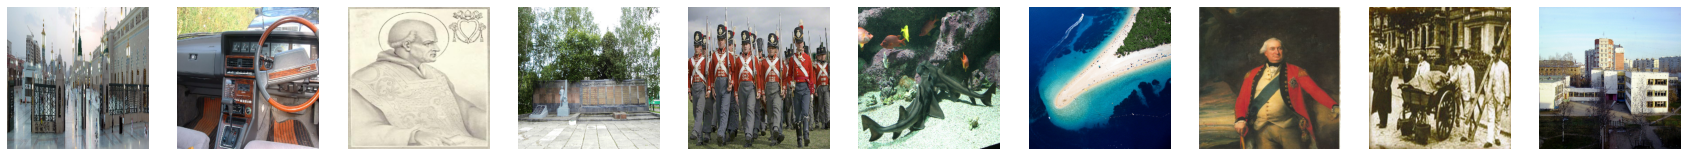

In [15]:
import skimage
import cv2
import numpy

LANGUAGES = LANGS # ['en', 'de', 'fr', 'es', 'ru', 'ckb', 'si', 'ia', 'xmf', 'cv']
DEMO_LANGUAGE = 4 # 'ru', TODO: change here to change the demo language
TEST_SAMPLES = 10

demo_data = data_dict['test'][DEMO_LANGUAGE]
demo_captions = []
demo_images = [] # list of ndarrays

# resize to 3 * 288 * 288 to fit the network
down_width = 288
down_height = 288
down_points = (down_width, down_height)

for i in range(TEST_SAMPLES):
    img = io.imread(demo_data.iloc[i].image_url)
    img_resized = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)
    demo_images.append(img_resized) 
    demo_captions.append(demo_data.iloc[i].caption_reference_description)

# io.imshow(demo_images[1])
print('All caption candidates:')
for i, cap in enumerate(demo_captions):
    print(i, "th caption:", cap)

fig = plt.figure()
fig.set_size_inches(30,5)
for i, img in enumerate(demo_images):
  a=fig.add_subplot(1,len(demo_images), i+1)
  plt.imshow(img, )
  plt.axis('off')


In [16]:
import torch
from PIL import Image

img_input = torch.stack([compose(Image.fromarray(img)) for img in demo_images])
# print(img_input)

with torch.no_grad():
    img_input = img_input.to('cuda')
    image_embs = clip_model.encode_image(img_input).float()
    language_embs = text_model(demo_captions) 

print("CLIP-Vision: {}".format(image_embs.shape))
print("Language Embedding: {}".format(language_embs.shape))

CLIP-Vision: torch.Size([10, 640])
Language Embedding: torch.Size([10, 640])


### Compare Predictions and Visualize Results

In [17]:
def compare_embeddings(logit_scale, img_embs, txt_embs):
  # normalized features
  image_features = img_embs / img_embs.norm(dim=-1, keepdim=True)
  text_features = txt_embs / txt_embs.norm(dim=-1, keepdim=True)

  # cosine similarity as logits
  logits_per_image = logit_scale * image_features @ text_features.t()
  logits_per_text = logit_scale * text_features @ image_features.t()

  # shape = [global_batch_size, global_batch_size]
  return logits_per_image, logits_per_text

# CLIP Temperature scaler
# logit_scale = clip_model.logit_scale.exp().float().to('cpu')
logit_scale = clip_model.logit_scale.exp().float()

embs = language_embs.to('cuda')
language_logits = compare_embeddings(logit_scale, image_embs, embs)

Language: ru


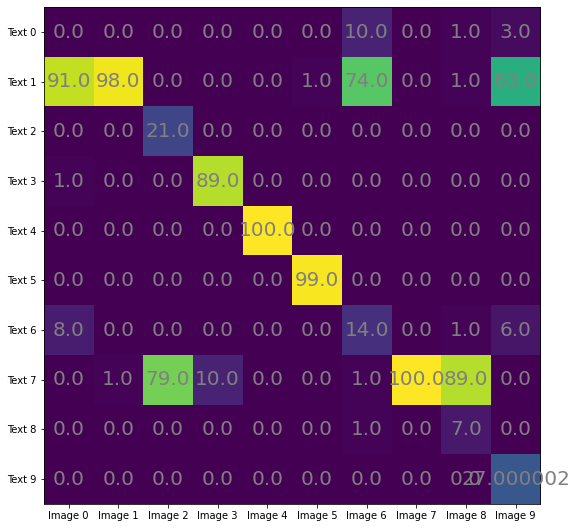

In [18]:
def plot_heatmap(result_matrix):
  height, width = result_matrix.shape
  fig, ax = plt.subplots()
  fig.set_size_inches(8,8)
  im = ax.imshow(result_matrix)



  # Create X & Y Labels
  ax.set_xticks(np.arange(width))
  ax.set_yticks(np.arange(height))
  ax.set_xticklabels(["Image {}".format(i) for i in range(width)])
  ax.set_yticklabels(["Text {}".format(i) for i in range(height)])

  for i in range(height):
    for j in range(width):
        text = ax.text(j, i, result_matrix[i, j],
                       ha="center", va="center", color='grey', size=20)

  fig.tight_layout()
  plt.show()

img_logits, txt_logits = language_logits
# Convert Logits into Softmax predictions
probs = img_logits.softmax(dim=-1).cpu().detach().numpy()

# Transpose so that each column is the softmax for each picture over the texts
probs = np.around(probs, decimals=2).T * 100
# print(probs)
# print(probs.argmax(axis=0))

print("Language: {}".format(LANGUAGES[DEMO_LANGUAGE]))
plot_heatmap(probs)

### Zero-shot Transfer Evaluation on Test
Next, we are going to apply the same evaluation process from the demo to the entire data_dict with 10 languages. We will perform zero-shot with a batch of image-text pairs in the same language, and compute the mean recall and mean precision for correctly matching the image with the text.

$$\text{Precision}_i = \frac{M_{ii}}{\sum_j M_{ji}}$$

$$\text{Recall}_i = \frac{M_{ii}}{\sum_j M_{ij}}$$


Some helper functions.

In [32]:
from sklearn.metrics import confusion_matrix
import numpy as np
import torch
from PIL import Image

# evaluate one batch of image-text pairs
def evaluate_on_batch(batch_captions, batch_images, start_idx):
    img_input = torch.stack([compose(Image.fromarray(img)) for img in batch_images])
    with torch.no_grad():
        img_input = img_input.to('cuda')
        image_embs = clip_model.encode_image(img_input).float()
        language_embs = text_model(batch_captions) 
    
    logit_scale = clip_model.logit_scale.exp().float()
    embs = language_embs.to('cuda')
    language_logits = compare_embeddings(logit_scale, image_embs, embs)

    img_logits, txt_logits = language_logits
    # Convert Logits into Softmax predictions
    probs = img_logits.softmax(dim=-1).cpu().detach().numpy()
    # Transpose so that each column is the softmax for each picture over the texts
    probs = np.around(probs, decimals=2).T * 100
    # Get the predicted label for each image
    preds = probs.argmax(axis=0) + start_idx
    return preds.tolist()

# compute mean precision/recall
def compute_metrics(labels, preds):
    labels = np.array(labels)
    preds = np.array(preds)
    cm = confusion_matrix(labels, preds)
    recall = np.diag(cm) / np.sum(cm, axis = 1)
    precision = np.diag(cm) / np.sum(cm, axis = 0)
    mean_recall = np.mean(recall)
    mean_precision = np.mean(precision)
    return mean_recall, mean_precision

The following cell might take some time to run.

In [43]:
import time

LANGUAGES = LANGS[:5] # ['en', 'de', 'fr', 'es', 'ru', 'ckb', 'si', 'ia', 'xmf', 'cv'], first five are most resourced, last five are most under-resourced
BATCH_SIZE = 10

# TODO:
# used for downsizing
down_width, down_height = 288, 288
down_points = (down_width, down_height)

for lang_id in range(len(LANGUAGES)):
# for lang_id in range(1): # uncomment this line for debugging
    lang_data = data_dict['test'][lang_id]
    num_entries = lang_data.shape[0] # number of rows
    # num_entries = min(30, lang_data.shape[0]) # uncomment this line for debugging
    labels = []
    preds = []

    i = 0 # entry index
    while(i + BATCH_SIZE <= num_entries):
        batch_captions = []
        batch_images = [] # list of ndarrays
        start_idx = i
        for j in range(BATCH_SIZE):
            # img = io.imread(lang_data.iloc[i].image_url)
            # Use the following try except to avoid 429 error
            try:
                img = io.imread(lang_data.iloc[i].image_url)
            except:
                time.sleep(1)
                img = io.imread(lang_data.iloc[i].image_url)
            img_resized = cv2.resize(img, down_points, interpolation=cv2.INTER_LINEAR)
            batch_images.append(img_resized) 
            batch_captions.append(lang_data.iloc[i].caption_reference_description)
            i += 1      
        # evaluate on one batch
        batch_preds = evaluate_on_batch(batch_captions, batch_images, start_idx)
        preds.extend(batch_preds)

        # # uncomment this block if need visualization
        # print(batch_captions)
        # fig = plt.figure()
        # fig.set_size_inches(30,5)
        # for j, img in enumerate(batch_images):
        #     a=fig.add_subplot(1,len(batch_images), j+1)
        #     plt.imshow(img, )
        #     plt.axis('off')
    
    labels = [j for j in range(i)]
    # compute metrics for the current language
    print(labels, preds)
    mean_recall, mean_precision = compute_metrics(labels, preds)
    print("Language:", LANGS[lang_id])
    print("Total examples:", len(labels))
    print("Mean recall:", mean_recall)
    print("Mean precision", mean_precision)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## Fine-tune the CLIP model with WIT
Load the WIT dataset to train a new model.